<a href="https://colab.research.google.com/github/ck1972/Geospatial-ML-Python/blob/main/Lab_3a_KNN_Machine_Learning_Fundamentals_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3a. KNN for Classification**
## **Data preparation**
To run the lab exercise, we are going to create a synthetic dataset comprising forest and non-forest classes. We will normalize the dataset (range [0, 1]) and split into training and testing set.

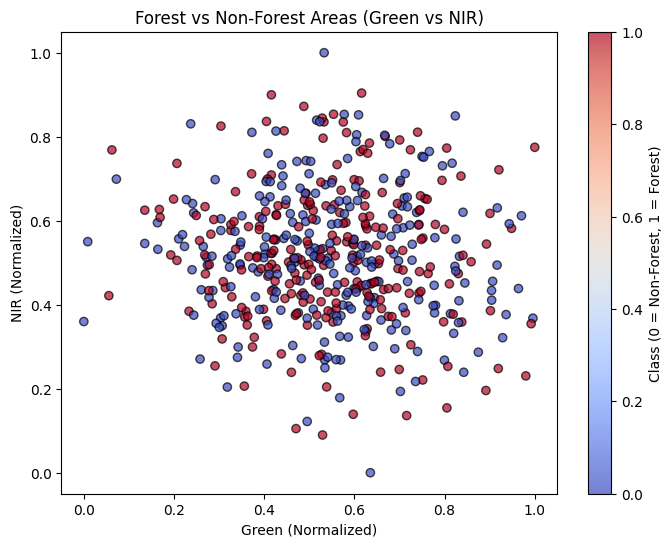

      Green       Red       NIR  Class
0  0.581227  0.788444  0.595671      1
1  0.337645  0.586252  0.378491      0
2  0.372091  0.851097  0.711539      1
3  0.605008  0.223380  0.804658      0
4  0.497955  0.766478  0.542586      1


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=3, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Convert into a DataFrame
data = pd.DataFrame(X, columns=['Green', 'Red', 'NIR'])
data['Class'] = y

# Normalize the features (Green, Red, NIR)
scaler = MinMaxScaler()
data[['Green', 'Red', 'NIR']] = scaler.fit_transform(data[['Green', 'Red', 'NIR']])

# Split into training and test sets
X = data[['Green', 'Red', 'NIR']].values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset in 2D (Green vs NIR)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Green (Normalized)')
plt.ylabel('NIR (Normalized)')
plt.title('Forest vs Non-Forest Areas (Green vs NIR)')
plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
plt.show()

# Display the first few rows of the DataFrame
print(data.head())

## **Function for Decision Boundaries**
Next, we are going to define a function to plot the decision boundary.

In [2]:
# Define function
def plot_decision_boundary(model, X, y, title):
    """
    Plots the decision boundary for a 2D dataset.
    """
    # Remove plt.figure(...) and plt.show() calls here
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot into the *current* axes
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Green")
    plt.ylabel("NIR")
    plt.title(title)
    plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')

# **KNN Classification Procedure**
We are going to initialize and train a KNN classifier. We create an instance of the KNN model, setting the number of neighbors (n_neighbors) to 3 and 5.

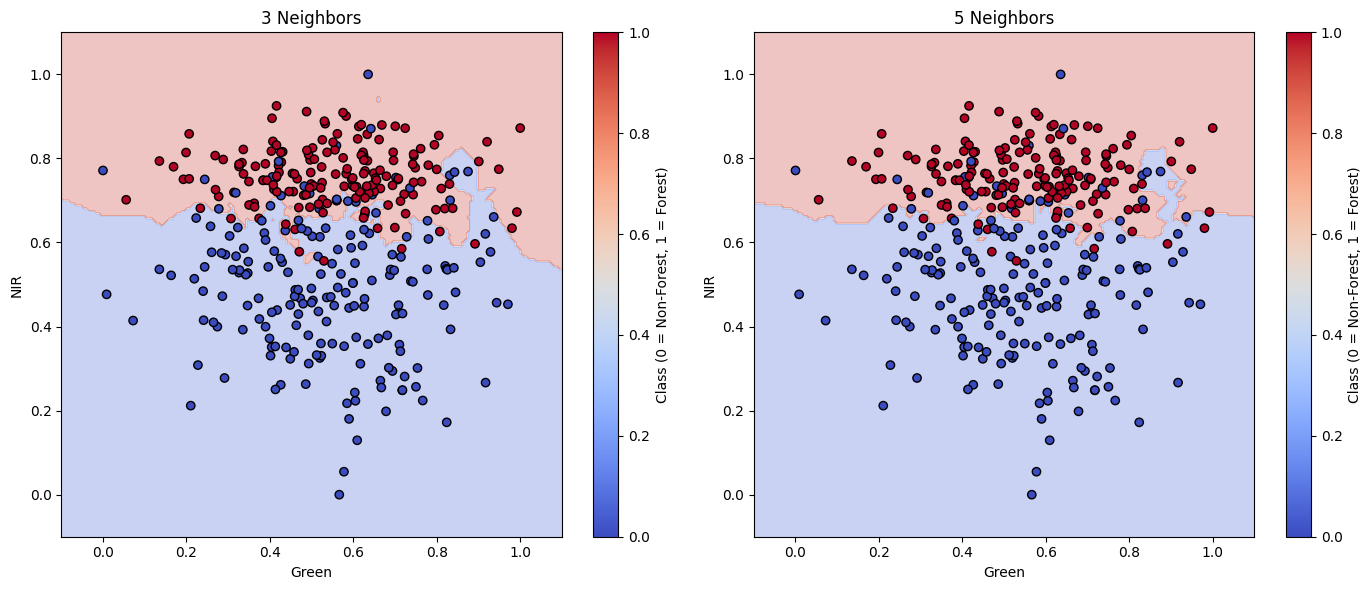

In [3]:
# Now in your main code:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create two different KNN models
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train[:, :2], y_train)
knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train[:, :2], y_train)

# Create a single figure with two subplots
plt.figure(figsize=(14,6))

# First subplot
plt.subplot(1, 2, 1)
plot_decision_boundary(knn_3, X_train[:, :2], y_train, "3 Neighbors")

# Second subplot
plt.subplot(1, 2, 2)
plot_decision_boundary(knn_5, X_train[:, :2], y_train, "5 Neighbors")

# Finally, show everything at once
plt.tight_layout()
plt.show()